Moore's law Linear regression

In [15]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests 
from bs4 import BeautifulSoup 


Downloading the table from wikipedia and storing locally

In [13]:
# Run this cell only for the first time
# This cell Needs internet connection make sure to connect to the internet

# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/Transistor_count"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
transistortable=soup.find('table',{'class':"wikitable sortable"})


df=pd.read_html(str(transistortable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())
# Save dataframe to pickled pandas object in local disk
df.to_pickle("data.plk") 

200
                                Processor  \
0  MP944 (20-bit, 6-chip, 28 chips total)   
1              Intel 4004 (4-bit, 16-pin)   
2                TMX 1795 (?-bit, 24-pin)   
3              Intel 8008 (8-bit, 18-pin)   
4              NEC μCOM-4 (4-bit, 42-pin)   

                     MOS transistor count Date ofintroduction  \
0  74,442 (5,360 excl. ROM & RAM)[25][26]         1970[23][a]   
1                                    2250                1971   
2                               3,078[27]                1971   
3                                    3500                1972   
4                           2,500[28][29]                1973   

             Designer MOS process(nm) Area (mm2)  
0  Garrett AiResearch               ?          ?  
1               Intel       10,000 nm     12 mm2  
2   Texas Instruments               ?     30 mm2  
3               Intel       10,000 nm     14 mm2  
4                 NEC    7,500 nm[30]          ?  


Data preprocessing and cleaning

In [18]:
# Load dataframe from pickled pandas object
df= pd.read_pickle("data.plk")

# delete the unwanted columns
data = df.drop(["Processor", "Designer", "MOS process(nm)", "Area (mm2)"], axis=1)

#print the data
with pd.option_context('display.max_rows', None,):
    print(data)


#Data cleaning
#Remove the citations and commas between numbers
y=df['MOS transistor count'].replace(to_replace=r"([0-99,\.]+)(.*)", value=r"\1", regex=True)
x=df['Date ofintroduction'].replace(to_replace=r"([0-99,\.]+)(.*)", value=r"\1", regex=True)
data=pd.concat([x, y], ignore_index=True, axis=1)
#Remove the comma between the numbers
data = data.replace(',','', regex=True)

#Drop the rows that has NaN 
data=data.dropna()

#print data
with pd.option_context('display.max_rows', None,):
    print(data)

#Drop the outlier (i noticed it by looking at the data)
data = data.drop(178)

clean_data = data.to_numpy()
clean_data = clean_data.astype(np.int64)

#seperating the years (x-axis) and transistor count (y-axis) data
yrs=clean_data[:,0]
cnt=clean_data[:,1]

# taking log to convert the exponential data to linear
cnt=np.log(cnt)

X=yrs.reshape([yrs.size,1])
X = np.hstack((np.ones((X.size,1)), X))
Y=cnt
Y=Y.reshape(Y.size,1)
print("shapes", X.shape, Y.shape)
print(X)

                       MOS transistor count Date ofintroduction
0    74,442 (5,360 excl. ROM & RAM)[25][26]         1970[23][a]
1                                      2250                1971
2                                 3,078[27]                1971
3                                      3500                1972
4                             2,500[28][29]                1973
5                               11,000+[31]                1973
6                                      3000                1974
7                                      4100                1974
8                                      6000                1974
9                                      8000            1974[32]
10                             4,528[b][33]                1975
11                                     4000                1975
12                                     5000                1975
13                                     5000                1976
14                                 8,500

Linear regression (Best fit line)

In [19]:
#     equation for variable optimization
#     x_hat = ((A'A)^-1)A'y
#     here according to our variables
#     theta = ((X'X)^-1)X'Y  this is implemented below

theta = np.zeros((2, 1))
theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))


# y = c + mx
fn=theta[0] + theta[1]*X[:,1]

Plotting

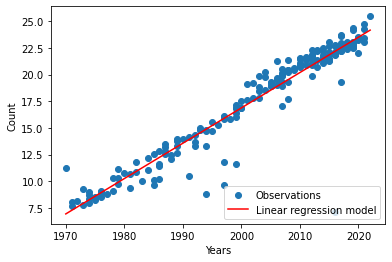

In [20]:
plt.scatter(yrs, cnt)
plt.plot(X[:,1],fn,'r')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend(["Observations", "Linear regression model"], loc ="lower right")
plt.show()